In [1]:
import torch
import torchvision

print(torch.__version__)
print(torchvision.__version__)


2.7.0
0.22.0


## Importing Libraries

In [2]:
!pip install torchinfo
!pip install tqdm

In [50]:
import os
from typing import List
from pathlib import Path
import PIL
from PIL import Image

import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader




from tqdm.auto import tqdm
import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn


In [4]:
train_image_path = Path('/Users/tinonturjamajumder/Downloads/seg_train')
test_image_path = Path('/Users/tinonturjamajumder/Downloads/seg_test')

In [5]:
train_image_path

PosixPath('/Users/tinonturjamajumder/Downloads/seg_train')

In [7]:
# Turn the image path into List
train_image_list = list(train_image_path.glob('*/*.jpg'))

# Get the length of the list
len(train_image_list)

14034

In [8]:
# Show some samples of image list
train_image_list[:5]

[PosixPath('/Users/tinonturjamajumder/Downloads/seg_train/forest/5109.jpg'),
 PosixPath('/Users/tinonturjamajumder/Downloads/seg_train/forest/14621.jpg'),
 PosixPath('/Users/tinonturjamajumder/Downloads/seg_train/forest/6366.jpg'),
 PosixPath('/Users/tinonturjamajumder/Downloads/seg_train/forest/4565.jpg'),
 PosixPath('/Users/tinonturjamajumder/Downloads/seg_train/forest/17472.jpg')]

## Plot Random Image

(-0.5, 149.5, 149.5, -0.5)

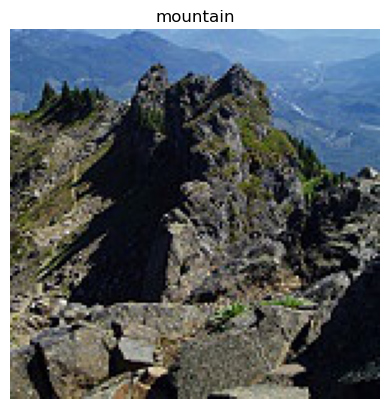

In [9]:
torch.manual_seed(42)
random.seed(42)
idx = random.randint(0,len(train_image_list))


img = Image.open(train_image_list[idx])

# get the class name from the list
class_name = train_image_list[idx].parent.name

plt.imshow(img)
plt.title(class_name)
plt.axis(False)

(-0.5, 149.5, 149.5, -0.5)

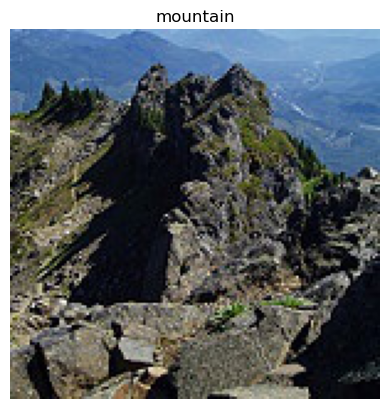

In [10]:
## Turn the image into numpy and plot it again
np_img = np.asarray(img)#.astype('float32')
np_img.shape # HWC
np_img = np_img/255.0

processed_size_img = torch.tensor(np_img,dtype = torch.float32)
plt.imshow(processed_size_img)
plt.title(class_name)
plt.axis(False)


In [11]:
# get the image of the original image and the processed image
print(f"Original Image Shape: {img.size}\nProcessed Image Shape: {processed_size_img.shape}")


Original Image Shape: (150, 150)
Processed Image Shape: torch.Size([150, 150, 3])


In [12]:
## Plot some random images from the dataset
random.seed(42)

def plot_random_images(k:int,
                      img_list:list,
                       display_shape: bool  = True
                      ):


    if k>10:
        k = 10
        display_shape = False
        print(f"For display, puprposes, k shouldn't be larger than 10")



    choose_img = random.sample(img_list,k)

    # setup plot
    plt.figure(figsize = (16,8))

    for idx, img in enumerate(choose_img):
        with Image.open(img) as f:
            plt.subplot(1,k,idx+1)
            plt.imshow(f)
            plt.title(img.parent.name)
            plt.axis(False)

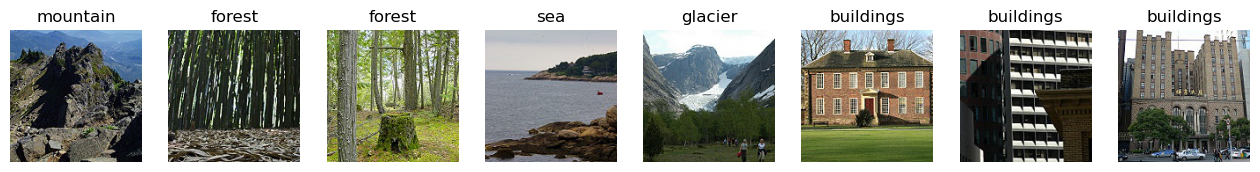

In [13]:
plot_six_images = plot_random_images(k = 8,
                                     img_list = train_image_list)

## Getting a Pretrainded Model

For this classification project I have used EfficientNet_B0 pretrained model and pretrained load EfficientNet_B0_Weights

In [14]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
model = torchvision.models.efficientnet_b0(weights=weights)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /Users/tinonturjamajumder/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


100%|████████████████████████████████| 20.5M/20.5M [00:04<00:00, 4.53MB/s]


## Transform Function

In [15]:
auto_transform = weights.transforms()
auto_transform


ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

## Create the Dataset

In [16]:
train_image_path,test_image_path

(PosixPath('/Users/tinonturjamajumder/Downloads/seg_train'),
 PosixPath('/Users/tinonturjamajumder/Downloads/seg_test'))

In [17]:
train_dataset = torchvision.datasets.ImageFolder(train_image_path,
                                                 transform = auto_transform)

test_dataset = torchvision.datasets.ImageFolder(test_image_path,
                                                 transform = auto_transform)


In [18]:
## Class Name

train_dataset.class_to_idx,train_dataset.classes

({'buildings': 0,
  'forest': 1,
  'glacier': 2,
  'mountain': 3,
  'sea': 4,
  'street': 5},
 ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'])

In [19]:
classes = train_dataset.classes

In [20]:
classes

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [21]:
## Get a specific example
img,label = train_dataset[0]

img.shape, label

# class index
class_idx = train_dataset.classes

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


(-0.5, 223.5, 223.5, -0.5)

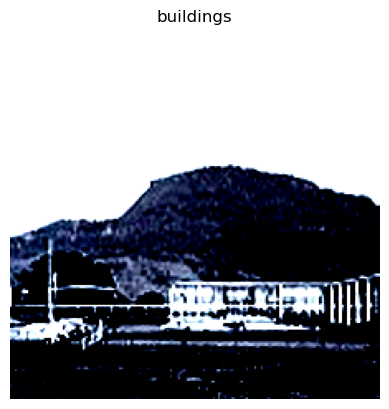

In [22]:
# plot the example
plt.imshow(img.permute(1,2,0))

plt.title(class_idx[label])
plt.axis(False)

## Create the DataLoader

In [23]:
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset = train_dataset,
                              batch_size = BATCH_SIZE,
                              shuffle = True
                              )

test_dataloader = DataLoader(dataset = test_dataset,
                              batch_size = BATCH_SIZE,
                              shuffle = False
                              )

In [24]:
 # sample of train dataloader
 batch_images, label = next(iter(train_dataloader))
 batch_images,label

(tensor([[[[ 0.5878,  0.5707,  0.5707,  ...,  1.3584,  1.3584,  1.3755],
           [ 0.6221,  0.6392,  0.6734,  ...,  1.4269,  1.4269,  1.4440],
           [ 0.6734,  0.7248,  0.7762,  ...,  1.5468,  1.5468,  1.5468],
           ...,
           [ 0.0912, -0.0116, -0.0972,  ..., -0.3198, -0.4739, -0.3712],
           [ 0.0741, -0.0116, -0.0972,  ..., -0.2513, -0.3541, -0.3369],
           [ 0.0569, -0.0287, -0.0972,  ..., -0.0972, -0.1314, -0.0801]],
 
          [[ 0.8704,  0.8529,  0.8529,  ...,  1.6057,  1.6057,  1.6232],
           [ 0.9055,  0.9230,  0.9580,  ...,  1.6758,  1.6758,  1.6933],
           [ 0.9580,  1.0105,  1.0455,  ...,  1.7983,  1.7983,  1.7983],
           ...,
           [ 0.5728,  0.4853,  0.4153,  ..., -0.0399, -0.2150, -0.1450],
           [ 0.5378,  0.4678,  0.4328,  ...,  0.0476, -0.0749, -0.0749],
           [ 0.5028,  0.4328,  0.4153,  ...,  0.2227,  0.1702,  0.1877]],
 
          [[ 1.1237,  1.1062,  1.1062,  ...,  1.7163,  1.7163,  1.7163],
           [ 

In [25]:
batch_images.shape,label.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

## Create the Model

In [26]:
model = torchvision.models.efficientnet_b0(weights = weights)

# Freeze the other parameters
for param in model.parameters():
  param.requires_grad =False


# Shape the classfier(output) layer of the model
model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p = 0.2,inplace = True),
    torch.nn.Linear(in_features = 1280,
                    out_features = 6)
)

In [27]:
from torchinfo import summary
summary(model = model,
        input_size = (32,3,224,224),
        col_names = ['input_size','output_size', 'num_params','trainable'],
        col_width = 20,
        row_settings = ['var_names'])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 6]              --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 

## Device Agnostic Code

In [28]:
device ='mps' if torch.backends.mps.is_available() else 'cpu'
device

'mps'

## Train

### Accuracy Function

In [29]:
def accuracy_fn(model,y_pred,y_true):
    pred_label = torch.argmax(y_pred,dim = 1)
    accuracy = (pred_label==y_true).sum().item()
    return accuracy

In [30]:
def train(model:torch.nn.Module,
         dataloader:torch.utils.data.DataLoader,
         optimizer: torch.optim.Optimizer,
         loss_fn: torch.nn.Module,device
         ):


    model.to(device)
    model.train()

    train_loss, num_samples,total_acc = 0,0,0

    for X, y in dataloader:

        X,y = X.to(device),y.to(device)

        # set the gradient zero
        optimizer.zero_grad()

        # forward pass
        y_logit = model(X)

        # Loss Calculation
        loss = loss_fn(y_logit,y)
        train_loss += loss.item()

        # backward
        loss.backward()

        # optimizer step
        optimizer.step()

        # accuracy calculation
        accuracy = accuracy_fn(model,y_logit,y)
        total_acc +=accuracy

        # sample count
        sample = X.shape[0]
        num_samples +=sample

    # Total train_loss and accuracy
    train_loss /= len(dataloader)
    total_acc /=num_samples



    return train_loss,total_acc

## Test

In [31]:
def test(model: torch.nn.Module,
        dataloader: torch.utils.data.DataLoader,
        loss_fn: torch.nn.Module,
         device):

    model.to(device)

    model.eval()

    test_loss,test_acc,num_samples = 0,0,0

    with torch.inference_mode():



        for X, y in dataloader:

            X,y = X.to(device),y.to(device)

            # forward pass
            y_logit = model(X)

            # Loss Calculation
            loss = loss_fn(y_logit,y)
            test_loss += loss.item()

            # Accuracy Calculation
            accuracy = accuracy_fn(model, y_logit,y)

            test_acc +=accuracy

            sample = X.shape[0]
            num_samples += sample


    # Total train_loss and accuracy
    test_loss /= len(dataloader)
    test_acc /= num_samples



    return test_loss,test_acc


In [32]:
def engine(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module,
          optimizer: torch.optim.Optimizer,
          epochs: int,
          device):

    results = {'train_loss':[],
              'test_loss':[],
              'train_acc':[],
              'test_acc':[]}


    for epoch in tqdm(range(epochs)):
        train_loss,train_acc = train(model = model,
                                    dataloader = train_dataloader,
                                    optimizer = optimizer,
                                    loss_fn = loss_fn,
                                    device = device)
        test_loss, test_acc = test(model = model,
                                  dataloader = test_dataloader,
                                  loss_fn = loss_fn,
                                  device= device)

        print(f'Epoch:{epoch}\nTrain_loss:{train_loss:.3f} | Train_Accuracy:{train_acc:.3f}\nTest_loss:{test_loss:.3f} | Test_Accuracy: {test_acc:.3f}\n')

        results['train_loss'].append(train_loss)
        results['test_loss'].append(test_loss)
        results['train_acc'].append(train_acc)
        results['test_acc'].append(test_acc)


    return results

In [33]:
# Create the instance of model
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
model = torchvision.models.efficientnet_b0(weights = weights).to(device)

# Freeze the other parameters
for params in model.features.parameters():
    params.requires_grad = False

output_shape = len(class_name)
# shape the out layer of the model
model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p = 0.2, inplace = True),
    torch.nn.Linear(in_features = 1280,
                   out_features = output_shape,
                   bias = True)
)

# Pick loss function and optimizer function
loss_fn = torch.nn.CrossEntropyLoss()

# Pick the optimizer
optimizer = torch.optim.Adam(model.parameters(),
                            lr = 1e-4)


In [34]:
training = engine(model = model,
                 train_dataloader = train_dataloader,
                 test_dataloader = test_dataloader,
                 loss_fn = loss_fn,
                 optimizer = optimizer,
                 epochs = 5,
                  device = device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch:0
Train_loss:1.296 | Train_Accuracy:0.661
Test_loss:0.868 | Test_Accuracy: 0.828

Epoch:1
Train_loss:0.748 | Train_Accuracy:0.824
Test_loss:0.601 | Test_Accuracy: 0.861

Epoch:2
Train_loss:0.588 | Train_Accuracy:0.844
Test_loss:0.502 | Test_Accuracy: 0.865

Epoch:3
Train_loss:0.512 | Train_Accuracy:0.853
Test_loss:0.450 | Test_Accuracy: 0.865

Epoch:4
Train_loss:0.477 | Train_Accuracy:0.854
Test_loss:0.413 | Test_Accuracy: 0.871



In [35]:
training

{'train_loss': [1.2958742037992543,
  0.7478450802844315,
  0.5876240415969579,
  0.5117239979242137,
  0.4765796411553385],
 'test_loss': [0.8677517090072023,
  0.6005223404536856,
  0.5016100748263775,
  0.4503092715873363,
  0.4132149836167376],
 'train_acc': [0.6613225024939433,
  0.8244263930454611,
  0.8437366395895682,
  0.8532136240558643,
  0.854424967935015],
 'test_acc': [0.828, 0.861, 0.8653333333333333, 0.865, 0.8713333333333333]}

In [36]:
train_loss = training['train_loss']

In [37]:
train_loss

[1.2958742037992543,
 0.7478450802844315,
 0.5876240415969579,
 0.5117239979242137,
 0.4765796411553385]

## Plot the curves

In [38]:
def plot_curves(results):

  train_loss, test_loss, train_acc, test_acc = results['train_loss'],results['test_loss'],results['train_acc'],results['test_acc']


  plt.figure(figsize = (15,7))


  epochs = [epoch for epoch in range(len(results['train_loss']))]

  plt.subplot(1,2,1)
  plt.plot(epochs, train_loss, label = "Train Loss")
  plt.plot(epochs, test_loss, label = "Test Loss")
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(epochs, train_acc, label = "Train Accuracy")
  plt.plot(epochs, test_acc, label = "Test Accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()


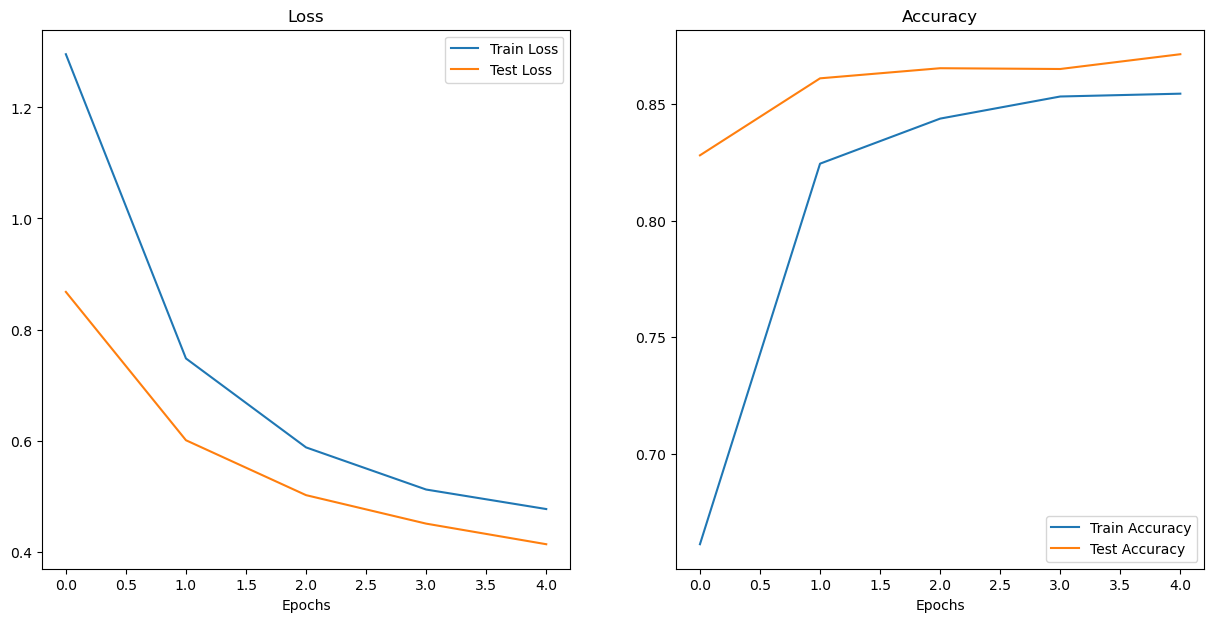

In [39]:
plt_loss_accuracy = plot_curves(training)

## Write a function to predict unknown images

In [51]:
def predict_unknown_image(model: torch.nn.Module,
                          image_path,
                          class_names: List[str] = None,
                          transform = None,
                          device: torch.device = device):

  """
  Got the image, open the image, convert it into tensor, reshape the image, add the batch, and pass it through the model


  """

  # Open the image
  targ_img = Image.open(image_path)


  # Transform the image if necessary
  if transform:
    target_img = transform(targ_img)


  # Turn on model evaluation mode
  model.eval()

  with torch.inference_mode():

    # Add an extra dimension to the image
    target_img = target_img.unsqueeze(dim = 0)

    # Make a prediction on image with an extra dimension and send it to the target device
    target_img_pred = model(target_img.to(device))

  # Convert logits --> prediction probabilities
  target_image_pred_probs = torch.softmax(target_img_pred, dim = 1)

  # Convert prediction probabilities --> prediction labels
  target_image_pred_label = torch.argmax(target_image_pred_probs, dim = 1)

  plt.imshow(Image.open(image_path))

  if class_names:
    title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
  else:
    title = f"Pred: {target_image_pred_label.cpu()} | Prob: {target_image_pred_probs.max().cpu():.3f}"

  plt.title(title)
  plt.axis(False)



In [52]:
img = Path('/Users/tinonturjamajumder/Intel_Image_Classification/Test_Data/IMG_9062.jpg')
img

PosixPath('/Users/tinonturjamajumder/Intel_Image_Classification/Test_Data/IMG_9062.jpg')

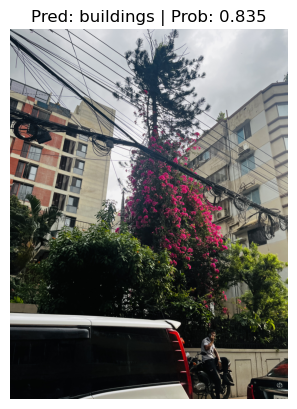

In [53]:
predict_img = predict_unknown_image(model= model,
                                    image_path=img,
                                    class_names = classes,
                                    transform = auto_transform,
                                    device = device)

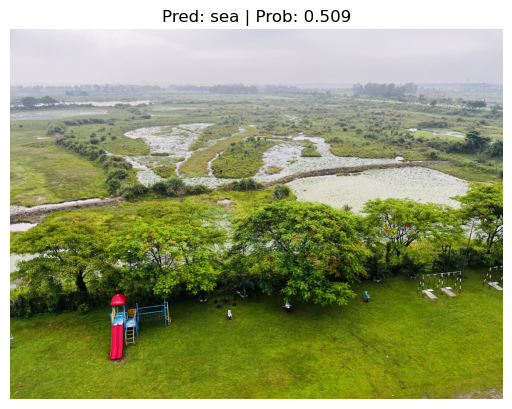

In [54]:
img_2 = Path('/Users/tinonturjamajumder/Intel_Image_Classification/Test_Data/IMG_8770.jpg')
predict_img = predict_unknown_image(model= model,
                                    image_path=img_2,
                                    class_names = classes,
                                    transform = auto_transform,
                                    device = device)

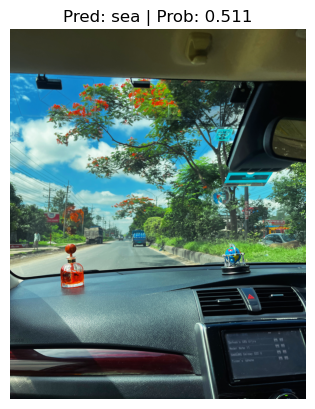

In [55]:
img_3 = Path('/Users/tinonturjamajumder/Intel_Image_Classification/Test_Data/A4F1A561-E291-44BC-98FE-99980F640D97.JPG')
predict_img = predict_unknown_image(model= model,
                                    image_path=img_3,
                                    class_names = classes,
                                    transform = auto_transform,
                                    device = device)
